In [ ]:
import torch
print(torch.cuda.is_available())


True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

base_path = '/content/drive/MyDrive/Adversarial_Attacks_Project/data/NIH_ChestXray'
print(os.listdir(base_path))


['Data_Entry_2017_v2020.csv', 'ChestXray_Pneumonia']


In [ ]:
import pandas as pd

csv_path = '/content/drive/MyDrive/Adversarial_Attacks_Project/data/NIH_ChestXray/Data_Entry_2017_v2020.csv'
df = pd.read_csv(csv_path)

print("Total rows:", len(df))
df.head()


Total rows: 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Sex,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [ ]:
# Keep only Pneumonia and No Finding samples
df_subset = df[df['Finding Labels'].isin(['Pneumonia', 'No Finding'])].copy()

# Binary labels: Pneumonia=1, No Finding=0
df_subset['label'] = (df_subset['Finding Labels'] == 'Pneumonia').astype(int)

print("Filtered rows:", len(df_subset))
df_subset.head()


Filtered rows: 60683


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Sex,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],label
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,0
13,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168,0.168,0
14,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168,0
15,00000005_002.png,No Finding,2,5,69,F,AP,2500,2048,0.168,0.168,0
16,00000005_003.png,No Finding,3,5,69,F,PA,2992,2991,0.143,0.143,0


In [ ]:
print("Unique labels in df_subset:")
print(df_subset['Finding Labels'].value_counts())

print("\nBinary label counts (0 = No Finding, 1 = Pneumonia):")
print(df_subset['label'].value_counts())


Unique labels in df_subset:
Finding Labels
No Finding    60361
Pneumonia       322
Name: count, dtype: int64

Binary label counts (0 = No Finding, 1 = Pneumonia):
label
0    60361
1      322
Name: count, dtype: int64


In [ ]:
counts = df_subset['label'].value_counts()
num_pos = counts.get(1, 0)  # Pneumonia
num_neg = counts.get(0, 0)  # No Finding

print("Available Pneumonia samples:", num_pos)
print("Available No Finding samples:", num_neg)

# Choose the max number we can safely sample from BOTH
n = min(num_pos, num_neg, 1000)  # 1000 is just an upper cap

print("We will sample this many from each class:", n)

df_pneu = df_subset[df_subset['label'] == 1].sample(n, random_state=42)
df_no   = df_subset[df_subset['label'] == 0].sample(n, random_state=42)

df_small = pd.concat([df_pneu, df_no]).reset_index(drop=True)

print(df_small['label'].value_counts())
df_small.head()


Available Pneumonia samples: 322
Available No Finding samples: 60361
We will sample this many from each class: 322
label
1    322
0    322
Name: count, dtype: int64


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Sex,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],label
0,00014647_009.png,Pneumonia,9,14647,41,M,PA,2674,2812,0.143,0.143,1
1,00012094_009.png,Pneumonia,9,12094,63,F,AP,2500,2048,0.168,0.168,1
2,00016705_002.png,Pneumonia,2,16705,24,M,PA,2974,2991,0.143,0.143,1
3,00000798_025.png,Pneumonia,25,798,64,F,AP,2500,2048,0.168,0.168,1
4,00010384_035.png,Pneumonia,35,10384,16,F,PA,2388,2468,0.143,0.143,1


In [ ]:
df_subset = df[df['Finding Labels'].isin(['Pneumonia', 'No Finding'])].copy()
df_subset['label'] = (df_subset['Finding Labels'] == 'Pneumonia').astype(int)


In [ ]:
print(df_subset['Finding Labels'].value_counts())
print(df_subset['label'].value_counts())


Finding Labels
No Finding    60361
Pneumonia       322
Name: count, dtype: int64
label
0    60361
1      322
Name: count, dtype: int64


In [ ]:
counts = df_subset['label'].value_counts()
num_pos = counts.get(1, 0)
num_neg = counts.get(0, 0)

print("Available Pneumonia samples:", num_pos)
print("Available No Finding samples:", num_neg)

n = min(num_pos, num_neg, 1000)
print("We will sample this many from each class:", n)

df_pneu = df_subset[df_subset['label'] == 1].sample(n, random_state=42)
df_no   = df_subset[df_subset['label'] == 0].sample(n, random_state=42)

df_small = pd.concat([df_pneu, df_no]).reset_index(drop=True)

print(df_small['label'].value_counts())
df_small.head()


Available Pneumonia samples: 322
Available No Finding samples: 60361
We will sample this many from each class: 322
label
1    322
0    322
Name: count, dtype: int64


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Sex,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],label
0,00014647_009.png,Pneumonia,9,14647,41,M,PA,2674,2812,0.143,0.143,1
1,00012094_009.png,Pneumonia,9,12094,63,F,AP,2500,2048,0.168,0.168,1
2,00016705_002.png,Pneumonia,2,16705,24,M,PA,2974,2991,0.143,0.143,1
3,00000798_025.png,Pneumonia,25,798,64,F,AP,2500,2048,0.168,0.168,1
4,00010384_035.png,Pneumonia,35,10384,16,F,PA,2388,2468,0.143,0.143,1


In [ ]:
import os

base_dir = '/content/drive/MyDrive/Adversarial_Attacks_Project/data/NIH_ChestXray/ChestXray_Pneumonia'
print(os.listdir(base_dir))

['chest_xray']


In [ ]:
data_dir = os.path.join(base_dir, 'chest_xray')
print("Inside chest_xray:", os.listdir(data_dir))


Inside chest_xray: ['train', '__MACOSX', 'test', 'chest_xray', 'val']


In [ ]:
train_dir = os.path.join(data_dir, 'train')
print("Train subfolders:", os.listdir(train_dir))


Train subfolders: ['PNEUMONIA', 'NORMAL']


Sample image path: /content/drive/MyDrive/Adversarial_Attacks_Project/data/NIH_ChestXray/ChestXray_Pneumonia/chest_xray/train/NORMAL/IM-0539-0001.jpeg


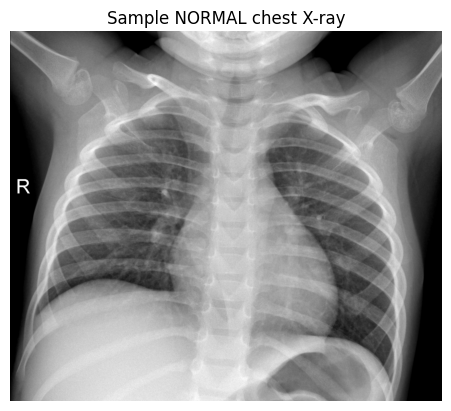

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# pick one NORMAL image
normal_dir = os.path.join(train_dir, 'NORMAL')
sample_img_name = os.listdir(normal_dir)[0]
img_path = os.path.join(normal_dir, sample_img_name)

print("Sample image path:", img_path)

img = Image.open(img_path)
plt.imshow(img, cmap='gray')
plt.title("Sample NORMAL chest X-ray")
plt.axis('off')
plt.show()


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)


Using device: cuda


In [ ]:
base_dir = '/content/drive/MyDrive/Adversarial_Attacks_Project/data/NIH_ChestXray/ChestXray_Pneumonia'
data_dir = os.path.join(base_dir, 'chest_xray')

train_dir = os.path.join(data_dir, 'train')
val_dir   = os.path.join(data_dir, 'val')
test_dir  = os.path.join(data_dir, 'test')

print("Train dir:", train_dir)
print("Val dir  :", val_dir)
print("Test dir :", test_dir)

print("Train subfolders:", os.listdir(train_dir))

Train dir: /content/drive/MyDrive/Adversarial_Attacks_Project/data/NIH_ChestXray/ChestXray_Pneumonia/chest_xray/train
Val dir  : /content/drive/MyDrive/Adversarial_Attacks_Project/data/NIH_ChestXray/ChestXray_Pneumonia/chest_xray/val
Test dir : /content/drive/MyDrive/Adversarial_Attacks_Project/data/NIH_ChestXray/ChestXray_Pneumonia/chest_xray/test
Train subfolders: ['PNEUMONIA', 'NORMAL']


In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),   # simple augmentation
    transforms.ToTensor(),               # [0,1]
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])  # roughly to [-1,1]
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])


In [ ]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset   = datasets.ImageFolder(root=val_dir,   transform=val_test_transforms)
test_dataset  = datasets.ImageFolder(root=test_dir,  transform=val_test_transforms)

print("Classes:", train_dataset.classes)  # should be ['NORMAL', 'PNEUMONIA'] or reversed
print("Train size:", len(train_dataset))
print("Val size:", len(val_dataset))
print("Test size:", len(test_dataset))


Classes: ['NORMAL', 'PNEUMONIA']
Train size: 5216
Val size: 16
Test size: 624


In [ ]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

print("DataLoaders ready.")


DataLoaders ready.


In [ ]:
import numpy as np

class_names = train_dataset.classes
print("Class names:", class_names)

def imshow_tensor(img_tensor, title=None):
    # undo normalization: x * std + mean
    img = img_tensor.clone().cpu().numpy()
    img = img.transpose((1, 2, 0))  # C,H,W -> H,W,C
    img = img * 0.5 + 0.5           # undo normalize
    img = np.clip(img, 0, 1)

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if title is not None:
        plt.title(title)


Class names: ['NORMAL', 'PNEUMONIA']


Batch shape: torch.Size([32, 3, 224, 224])
Labels: [1, 1, 1, 1, 1, 1, 1, 0]


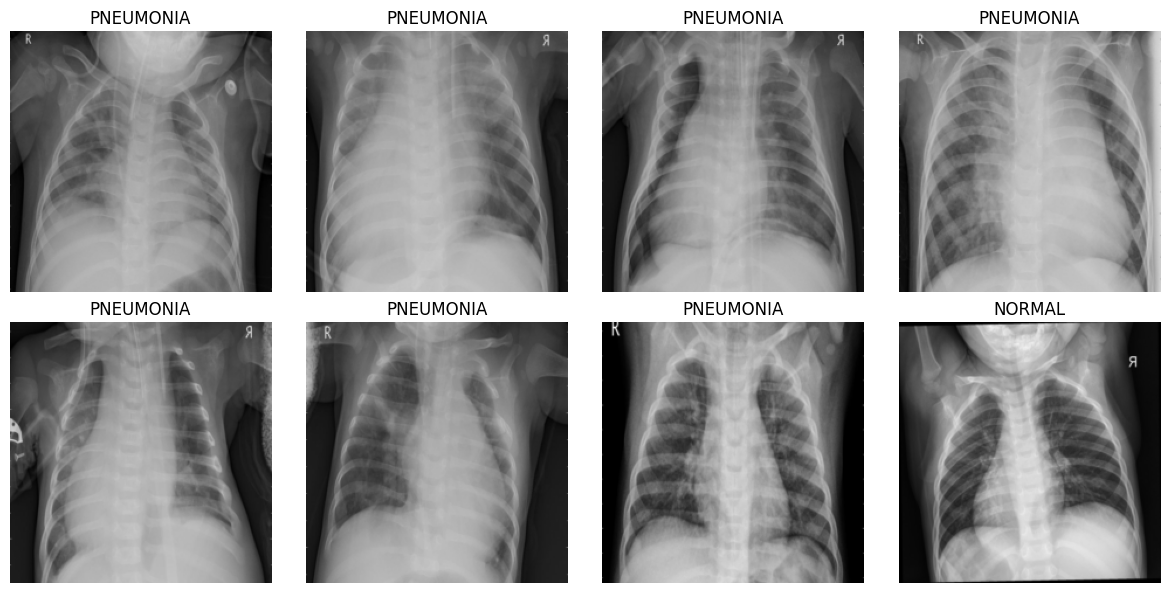

In [ ]:
# Get one batch from the train loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

print("Batch shape:", images.shape)
print("Labels:", labels[:8].tolist())

# Plot first 8 images
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    label_idx = labels[i].item()
    label_name = class_names[label_idx]
    imshow_tensor(images[i], title=label_name)
plt.tight_layout()
plt.show()


In [ ]:
images, labels = next(iter(train_loader))
images = images.to(device)
labels = labels.to(device)

print("Images device:", images.device)
print("Labels device:", labels.device)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images device: cuda:0
Labels device: cuda:0
Images shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)


Using device: cuda


In [ ]:
base_dir = '/content/drive/MyDrive/Adversarial_Attacks_Project/data/NIH_ChestXray/ChestXray_Pneumonia'
data_dir = os.path.join(base_dir, 'chest_xray')

train_dir = os.path.join(data_dir, 'train')
val_dir   = os.path.join(data_dir, 'val')
test_dir  = os.path.join(data_dir, 'test')
print(os.listdir(train_dir))


['PNEUMONIA', 'NORMAL']


In [ ]:
class_names = ['NORMAL', 'PNEUMONIA']  # or train_dataset.classes if already defined
print("Class names:", class_names)


Class names: ['NORMAL', 'PNEUMONIA']


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 224 -> 112

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 112 -> 56

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)   # 56 -> 28
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()  # output in [0,1] for binary
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = SimpleCNN().to(device)
print(model)


SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100352, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in loader:
        images = images.to(device)
        labels = labels.float().to(device).unsqueeze(1)  # (batch,) -> (batch,1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        preds = (outputs >= 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc


def eval_one_epoch(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.float().to(device).unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)

            preds = (outputs >= 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc


In [ ]:
num_epochs = 5

train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = eval_one_epoch(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}: "
          f"Train loss={train_loss:.4f}, acc={train_acc:.3f} | "
          f"Val loss={val_loss:.4f}, acc={val_acc:.3f}")


Epoch 1/5: Train loss=0.2448, acc=0.897 | Val loss=1.0902, acc=0.625
Epoch 2/5: Train loss=0.1115, acc=0.960 | Val loss=0.6549, acc=0.688
Epoch 3/5: Train loss=0.0918, acc=0.964 | Val loss=0.8203, acc=0.625
Epoch 4/5: Train loss=0.0862, acc=0.970 | Val loss=0.3041, acc=0.938
Epoch 5/5: Train loss=0.0727, acc=0.972 | Val loss=0.3143, acc=0.938


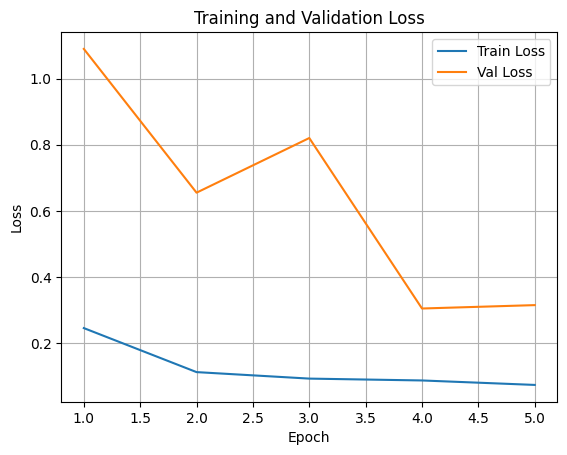

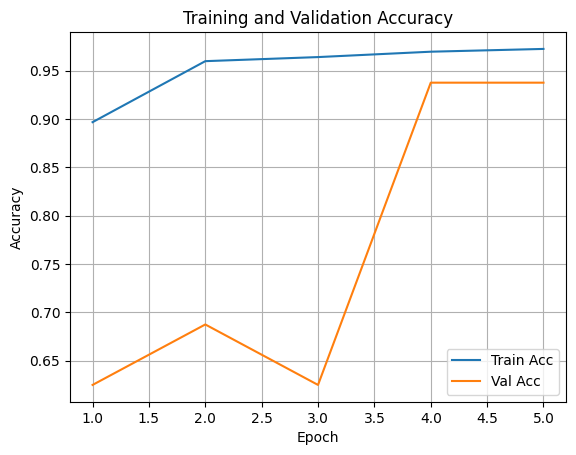

In [ ]:
# Loss plot
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy plot
plt.figure()
plt.plot(range(1, num_epochs+1), train_accs, label='Train Acc')
plt.plot(range(1, num_epochs+1), val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_loss, test_acc = eval_one_epoch(model, test_loader, criterion, device)
print(f"Clean Test Loss: {test_loss:.4f}")
print(f"Clean Test Accuracy: {test_acc:.3f}")


Clean Test Loss: 1.0506
Clean Test Accuracy: 0.752


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

all_labels = []
all_preds = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = (outputs >= 0.5).float().squeeze(1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))


Confusion Matrix:
 [[ 82 152]
 [  3 387]]

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.35      0.51       234
   PNEUMONIA       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.67      0.67       624
weighted avg       0.81      0.75      0.71       624



In [ ]:
model_path = '/content/drive/MyDrive/Adversarial_Attacks_Project/code/simple_cnn_pneumonia.pth'
torch.save(model.state_dict(), model_path)
print("Model saved to:", model_path)


Model saved to: /content/drive/MyDrive/Adversarial_Attacks_Project/code/simple_cnn_pneumonia.pth


In [ ]:
model = SimpleCNN().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()


SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100352, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
def fgsm_attack(model, images, labels, epsilon):
    images = images.clone().detach().to(device)
    labels = labels.clone().detach().float().unsqueeze(1).to(device)
    images.requires_grad = True

    outputs = model(images)
    loss = criterion(outputs, labels)
    model.zero_grad()
    loss.backward()

    data_grad = images.grad.data
    sign_grad = data_grad.sign()

    perturbed_images = images + epsilon * sign_grad
    perturbed_images = torch.clamp(perturbed_images, -1, 1)  # keep normalized range

    return perturbed_images.detach()


In [ ]:
def evaluate_under_attack(model, loader, epsilon):
    correct = 0
    total = 0
    model.eval()

    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)

        adv_images = fgsm_attack(model, images, labels, epsilon)
        outputs = model(adv_images)
        preds = (outputs >= 0.5).float().squeeze(1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return correct / total


In [ ]:
epsilons = [0.0, 0.01, 0.03, 0.05, 0.1]

acc_results = {}

for eps in epsilons:
    acc = evaluate_under_attack(model, test_loader, eps)
    acc_results[eps] = acc
    print(f"Epsilon {eps}: Test Accuracy = {acc:.3f}")


Epsilon 0.0: Test Accuracy = 0.752
Epsilon 0.01: Test Accuracy = 0.676
Epsilon 0.03: Test Accuracy = 0.575
Epsilon 0.05: Test Accuracy = 0.455
Epsilon 0.1: Test Accuracy = 0.146


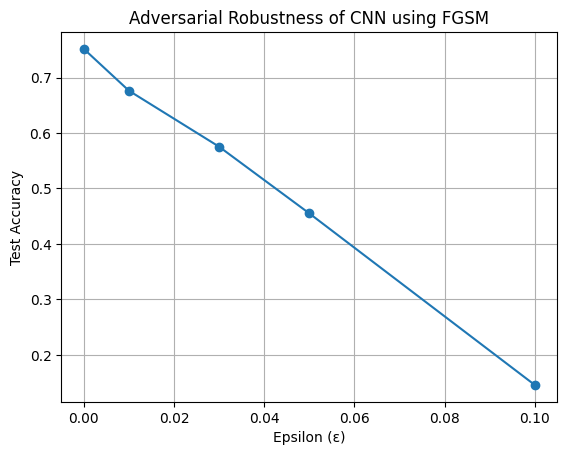

In [ ]:
plt.figure()
plt.plot(list(acc_results.keys()), list(acc_results.values()), marker='o')
plt.xlabel("Epsilon (ε)")
plt.ylabel("Test Accuracy")
plt.title("Adversarial Robustness of CNN using FGSM")
plt.grid(True)
plt.show()


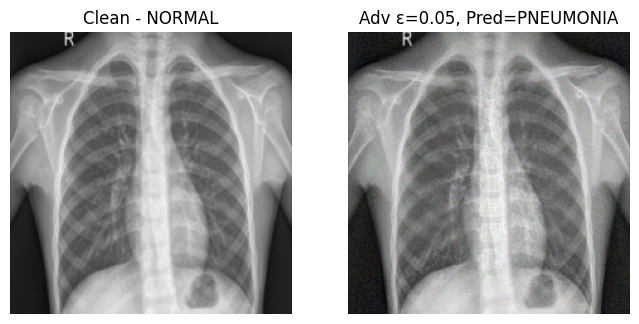

In [ ]:
# get one batch
data_iter = iter(test_loader)
images, labels = next(data_iter)

index = 0
image = images[index].to(device)
label = labels[index].to(device)

eps = 0.05  # medium attack strength
adv_image = fgsm_attack(model, image.unsqueeze(0), torch.tensor([label]), eps)[0]

def show_image(tensor, title=None):
    img = tensor.detach().cpu().numpy().transpose(1,2,0)
    img = img * 0.5 + 0.5  # unnormalize
    img = np.clip(img, 0, 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if title:
        plt.title(title)

# Plot side-by-side
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
show_image(image, f"Clean - {class_names[label.item()]}")
plt.subplot(1,2,2)
# get predictions
clean_pred = model(image.unsqueeze(0))
adv_pred = model(adv_image.unsqueeze(0))
clean_label = int((clean_pred >= 0.5).item())
adv_label = int((adv_pred >= 0.5).item())

show_image(adv_image, f"Adv ε={eps}, Pred={class_names[adv_label]}")
plt.show()
